In [1]:
from fastai.text import *

In [101]:
df = pd.read_csv("valvstest-fixed.tsv", sep="\t")
# fix issue in the data accuracy is actually F1_batch_avg
#df = df.rename(columns={"accuracy": "F1_batch_avg"})
df["dataset"]=df["dataset"].str.strip()
df.head()

,index,LMseed,ft,clsseed,dataset,F1_score,loss,accuracy
0,0,0,ft-seed0,2,test,0.564516,0.430445,0.8920
1,120,0,ft-seed0,2,valid,0.416667,0.422563,0.8839
2,6,0,ft-seed0,3,test,0.592593,0.416533,0.8900
3,126,0,ft-seed0,3,valid,0.460674,0.434416,0.8863
4,12,0,ft-seed0,4,test,0.606557,0.481438,0.9040


In [102]:
df["loss"].describe(), df["F1_score"].describe()

(count    240.000000
 mean       0.454483
 std        0.086787
 min        0.271477
 25%        0.405409
 50%        0.440903
 75%        0.498287
 max        0.787635
 Name: loss, dtype: float64, count    240.000000
 mean       0.499472
 std        0.067876
 min        0.379310
 25%        0.441921
 50%        0.483615
 75%        0.565879
 max        0.636704
 Name: F1_score, dtype: float64)

In [103]:
df['model_name'] = df["LMseed"].map(str)+ "-"+df["ft"]+"-"+df["clsseed"].map(str)

In [111]:
dfp = df.pivot(index="model_name", columns="dataset", values=["F1_score", "loss", "accuracy"]).sort_values(("F1_score","valid"))
dfp.head()

F1_score                loss           accuracy        
dataset            test     valid      test     valid     test   valid
model_name                                                            
1-ft-seed1-4   0.583630  0.379310  0.381665  0.368908    0.883  0.8720
0-noft-4       0.540541  0.381395  0.517359  0.590351    0.847  0.8424
1-noft-3       0.564315  0.386667  0.480363  0.479577    0.895  0.8910
1-ft-seed1-21  0.582781  0.388626  0.361739  0.397997    0.874  0.8472
1-noft-4       0.582192  0.393258  0.398434  0.410791    0.878  0.8720

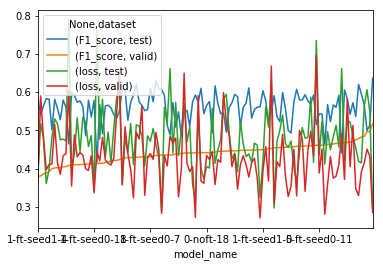

In [105]:
dfp.plot()

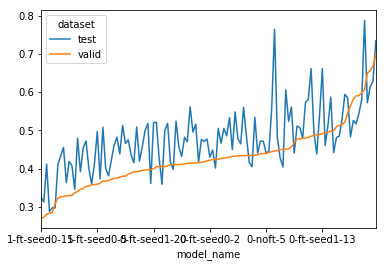

In [106]:
dfp.sort_values(("loss","valid"))["loss"].plot()

### There is corellation Loss on valid & test

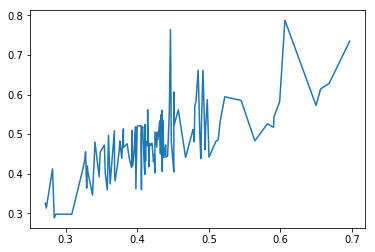

In [107]:
xy=dfp.sort_values(("loss","valid"))
ax = plt.plot(xy["loss"]['valid'], xy["loss"]['test'])

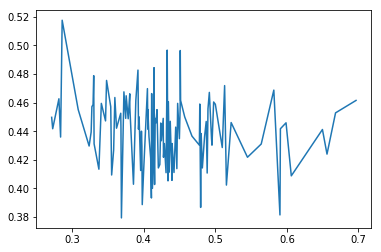

In [108]:
xy=dfp.sort_values(("loss","valid"))
ax = plt.plot(xy["loss"]['valid'], xy["F1_score"]['valid'])

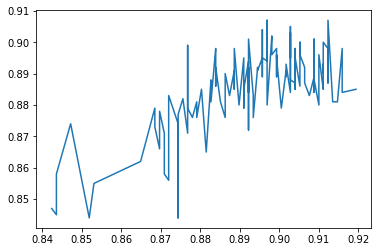

In [112]:
xy=dfp.sort_values(("accuracy","valid"))
ax = plt.plot(xy["accuracy"]['valid'], xy["accuracy"]['test'])

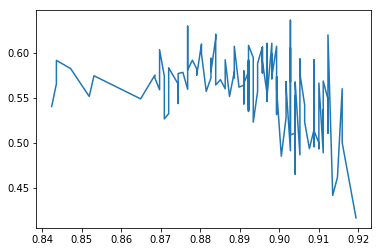

In [113]:
xy=dfp.sort_values(("accuracy","valid"))
ax = plt.plot(xy["accuracy"]['valid'], xy["F1_score"]['test'])

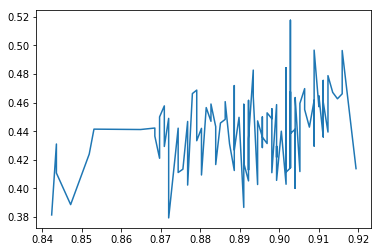

In [114]:
xy=dfp.sort_values(("accuracy","valid"))
ax = plt.plot(xy["accuracy"]['valid'], xy["F1_score"]['valid'])

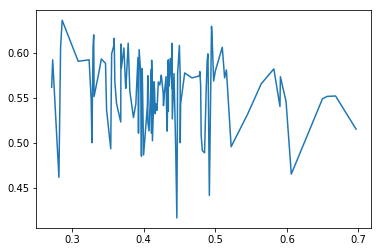

In [115]:
xy=dfp.sort_values(("loss","valid"))
ax = plt.plot(xy["loss"]['valid'], xy["F1_score"]['test'])

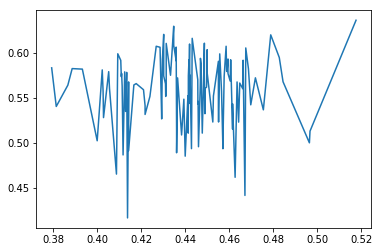

In [116]:
xy=dfp.sort_values(("F1_score","valid"))
ax = plt.plot(xy["F1_score"]['valid'], xy["F1_score"]['test'])

In [117]:
dfp.sort_values(("F1_score","valid")).tail()

F1_score                loss           accuracy        
dataset            test     valid      test     valid     test   valid
model_name                                                            
0-noft-20      0.595156  0.482759  0.415361  0.392013    0.883  0.8934
1-ft-seed1-17  0.568093  0.484472  0.561745  0.414461    0.889  0.9017
0-ft-seed1-6   0.500000  0.496454  0.606656  0.451102    0.884  0.9159
0-ft-seed0-19  0.513043  0.496732  0.548660  0.432850    0.888  0.9088
1-ft-seed1-8   0.636704  0.517647  0.297993  0.286143    0.903  0.9028